In [1]:
import networkx as nx
G = nx.Graph()

In [ ]:
import copy

In [ ]:
import math

In [2]:
G.add_nodes_from([1, 2, 3, 4, 5, 6])

In [3]:
G.add_node(7)
print(G)

Graph with 7 nodes and 0 edges


In [4]:
G.add_edges_from([(1,2), (1,3), (2,4), (3,7), (5,7)])
print(G)

Graph with 7 nodes and 5 edges


[1, 4]

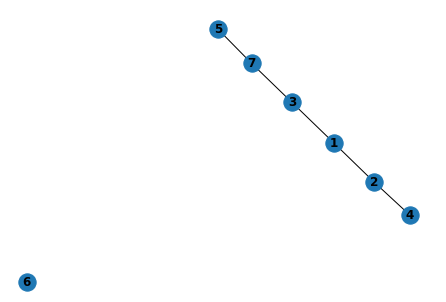

In [5]:
nx.draw(G,with_labels=True, font_weight='bold')
[n for n in G[2]]

In [20]:
m1 = nx.k_shell(G)
# print(m1)
# nx.draw(m1)
m2 = nx.k_shell(G, 1)
print(len(m2.nodes.data()))
# nx.draw(m2, with_labels=True, font_weight='bold')

6


In [ ]:
H = copy.deepcopy(G)
H.nodes[7]["room"] = 418
print(H.nodes.data())
print(G.nodes.data())

[(1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {'room': 418})]
[(1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {})]


In [ ]:
G1 = nx.read_edgelist('./0.edges', create_using=nx.Graph(), nodetype=int)

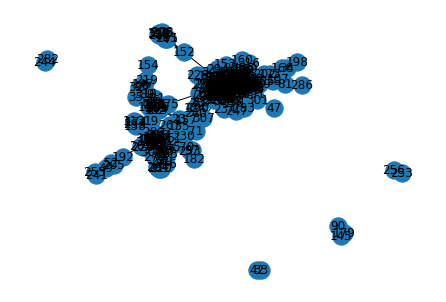

In [ ]:
nx.draw(G1, with_labels=True)

In [ ]:
print(G1)

Graph with 333 nodes and 2519 edges


In [ ]:
# G1.nodes[1]
# G1.nodes.data()
# type(G1.nodes.data())

# needs to run once only

# for x in G1.nodes.data():
#   # print(x[0])
#   G1.nodes[x[0]]['shell_no'] =  -1
#   G1.nodes[x[0]]['visited'] = False
#   G1.nodes[x[0]]['noOfNeigh'] = -1
#   G1.nodes[x[0]]['listOfNeigh'] = []

G1.nodes.data()

NodeDataView({236: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 186: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 122: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 285: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 24: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 346: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 271: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 304: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 176: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 9: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 130: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 329: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfNeigh': []}, 204: {'shell_no': -1, 'visited': False, 'noOfNeigh': -1, 'listOfN

In [ ]:
for x in G1.nodes.data():
  listOfNeighOfX0 = [n for n in G1[x[0]]]
  G1.nodes[x[0]]['noOfNeigh'] = len(listOfNeighOfX0)
  G1.nodes[x[0]]['listOfNeigh'] = listOfNeighOfX0

G1.nodes.data()
# direct neighbours of a vertex
# [n for n in G1[227]]


In [ ]:
# creating a deepcopy of the Graph G1
H2 = copy.deepcopy(G1)

In [ ]:
# k = math.floor(len(H2.nodes.data()) * 0.05)
# kshell decomposition here
# have to use recursion
# for shell_no in range(1, k+1):
#   for x in H2.nodes.data():
#     if x[1]['noOfNeigh'] == shell_no:
#       G1.nodes[x[0]]['shell_no'] = shell_no
#       H2.remove_node(x[0])



In [ ]:
def updateNeighborData(G):
  for x in G.nodes.data():
  listOfNeighOfX0 = [n for n in G[x[0]]]
  G.nodes[x[0]]['noOfNeigh'] = len(listOfNeighOfX0)
  G.nodes[x[0]]['listOfNeigh'] = listOfNeighOfX0

def checkKNeighbours(G, k):
  for x in G.nodes.data():
    if x[1]['noOfNeigh'] == k:
      return True
  return False

def kDecompose(G, OG , k=1):
  if(len(G.nodes.data()) == 0):
    return
  b = checkKNeighbours(G, k)
  if b:
    for x in G.nodes.data():
      if x[1]['noOfNeigh'] == k:
        OG.nodes[x[0]]['shell_no'] = k
      G.remove_node(x[0])
    updateNeighborData(G)
    kDecompose(G, OG, k)
  else: 
    kDecompose(G, OG, k+1)